In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
data_dir=r"C:\Users\koreg\Desktop\Jupyter Files\Images"

In [3]:
img_height,img_width=180,180
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4920 files belonging to 2 classes.
Using 3936 files for training.


In [4]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4920 files belonging to 2 classes.
Using 984 files for validation.


In [5]:
class_names = train_ds.class_names
print(class_names)

['glasses', 'no_glasses']


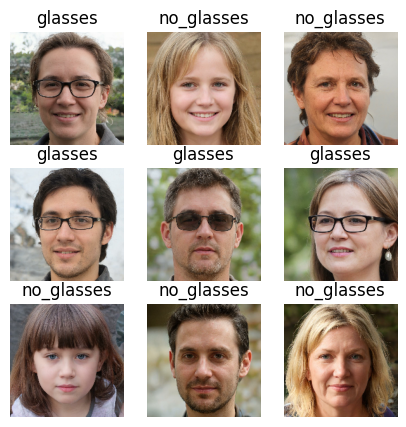

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [7]:
num_classes = 2

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes,activation='softmax')
])

In [8]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [9]:
epochs=10
epochs_hist = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10


C:\Users\koreg\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\backend.py:5714: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


123/123 [==============================] - 75s 602ms/step - loss: 0.1692 - accuracy: 0.9215 - val_loss: 0.0091 - val_accuracy: 0.9970
Epoch 2/10
123/123 [==============================] - 63s 513ms/step - loss: 0.0160 - accuracy: 0.9947 - val_loss: 0.0085 - val_accuracy: 0.9970
Epoch 3/10
123/123 [==============================] - 72s 585ms/step - loss: 0.0082 - accuracy: 0.9980 - val_loss: 0.0029 - val_accuracy: 0.9980
Epoch 4/10
123/123 [==============================] - 73s 587ms/step - loss: 9.3210e-04 - accuracy: 0.9995 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 5/10
123/123 [==============================] - 64s 520ms/step - loss: 0.0069 - accuracy: 0.9975 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 6/10
123/123 [==============================] - 64s 514ms/step - loss: 3.3496e-04 - accuracy: 1.0000 - val_loss: 4.1567e-04 - val_accuracy: 1.0000
Epoch 7/10
123/123 [==============================] - 65s 522ms/step - loss: 7.4638e-05 - accuracy: 1.0000 - val_loss: 2.3177e-04

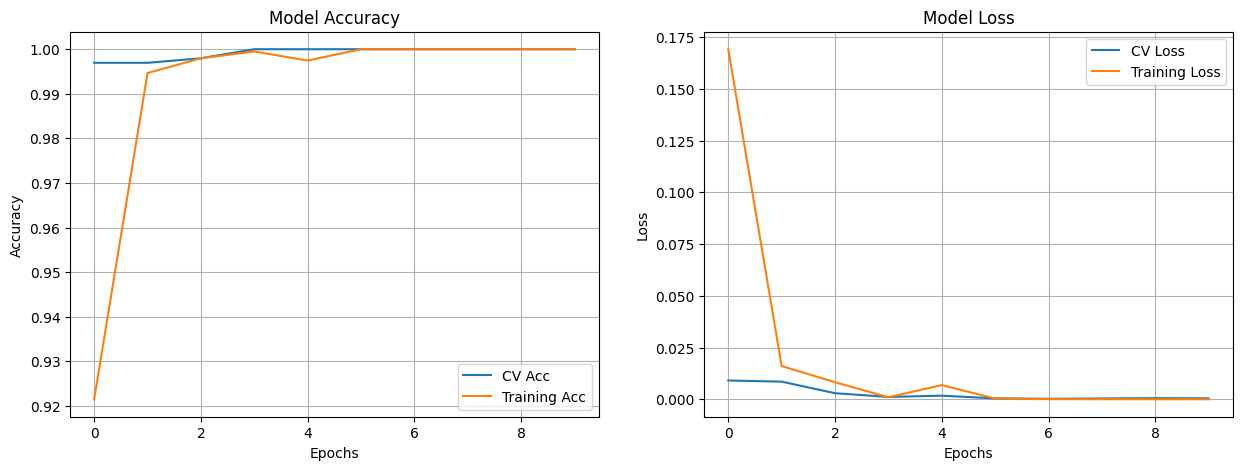

In [12]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(epochs_hist.history['val_accuracy'], label = 'CV Acc')
plt.plot(epochs_hist.history['accuracy'], label = 'Training Acc')
plt.title("Model Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs_hist.history['val_loss'], label = 'CV Loss')
plt.plot(epochs_hist.history['loss'], label = 'Training Loss')
plt.title("Model Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.legend()
plt.show()

In [19]:
model.save('face_glass.keras')

In [20]:
score = model.evaluate(train_ds, batch_size=32, verbose=1)

123/123 [==============================] - 16s 131ms/step - loss: 1.1586e-05 - accuracy: 1.0000


In [21]:
print("Accuracy on Test Set : {:.2f}%".format(score[1]*100))

Accuracy on Test Set : 100.00%


In [24]:
from keras.models import load_model
face_glass_model=load_model('face_glass.keras')

In [25]:
import gradio as gr
from tensorflow.keras.preprocessing import image
from PIL import Image
def preprocess_image(img):
    if isinstance(img, np.ndarray):
        img = Image.fromarray(img)
    img = img.resize((180, 180))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return img_array
def face_glass(img):
    img_array = preprocess_image(img)
    predictions = face_glass_model.predict(img_array)
    predicted_value = class_names[np.argmax(predictions)]
    return predicted_value
iface = gr.Interface(fn=face_glass, inputs="image", outputs="text")
iface.launch()


Running on local URL:  http://127.0.0.1:7870

To create a public link, set `share=True` in `launch()`.


1/1 [==============================] - 0s 23ms/step
